# 1. Примитивный однослойный персептрон с самообучением. Персептрон Розенблатта. 

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

ModuleNotFoundError: No module named 'distutils'

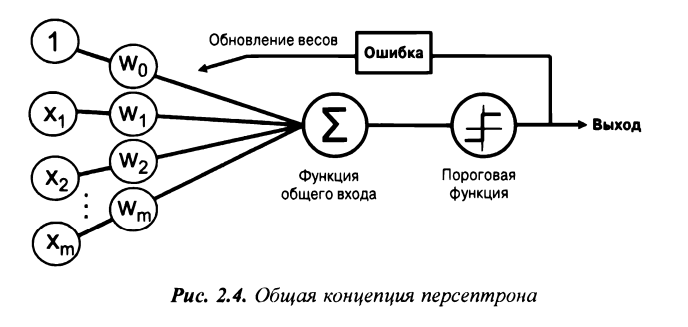

## Создание

In [40]:
import numpy as np
class Perceptron(object):
    """
    Параметры
    eta : float скорость обучения (от 0.0 до 1.0)
    n_inter : int количество эпох
    random_state : int начальное значение генератора случайных чисел для инициализации случайными весами
    Атрибуты
    w_ одмомерный массив весов
    errors_ список неправильных классификаций в каждой эпохе
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """
        Обучение персептрона.
        X: {массив обучающих векторов} форма = [n_examples, n_features] (кол-во образцов и кол-во признаков)
        y: {целевые значения} форма = [n_examples] (кол-во значений)
        return: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+ X.shape[1])
        self.errors_ = []
        for _ in range (self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X)>=0.0, 1, -1) # если больше 0 - то 1. если меньше нуля -1

## Самообучение:

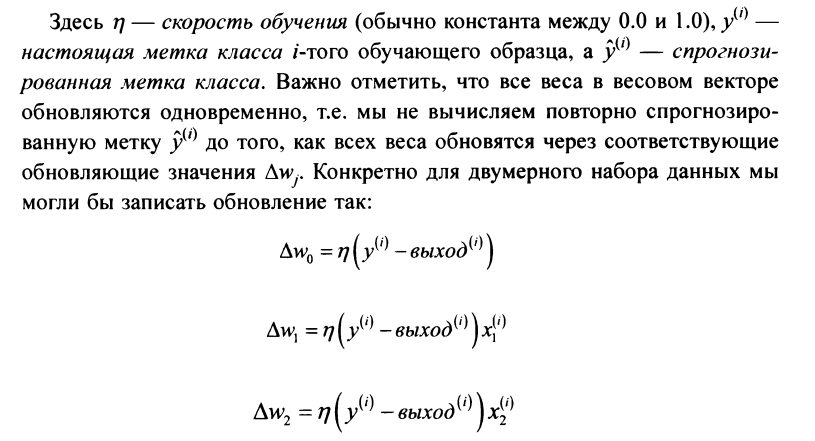

## Пороговая функция

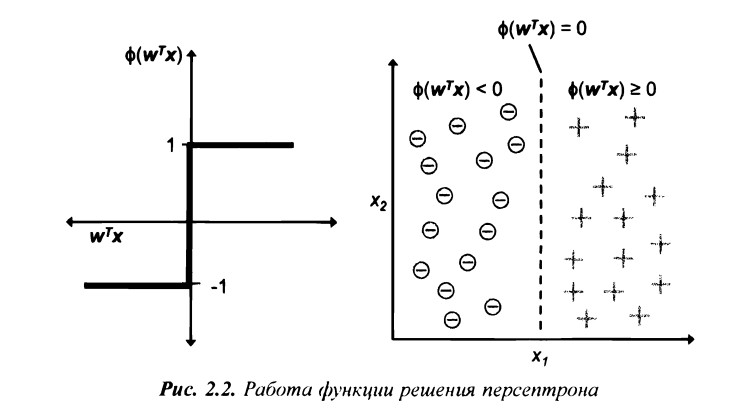

## Применение на практике. Решение задачи классификации цветка ириса. 

### Загрузка данных

In [41]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml','machine-learning-databases','iris' , 'iris.datа')
print( 'URL: ', s)

URL:  https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.datа


In [42]:
df = pd.read_csv('iris/iris.data' ,header=None, encoding=' utf-8' ) 
df.tail()
# 0 - длина чашелистика
# 1 - шрирна чашелистика
# 2 - длина лепестка
# 3 - ширина лепестка
# 4 - название

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


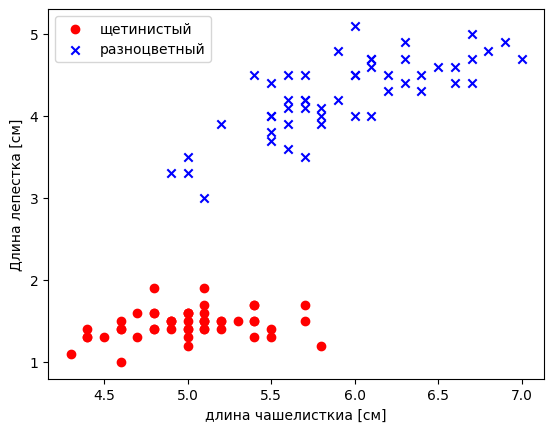

In [43]:
import matplotlib.pyplot as plt
import numpy as np
# создаем обучающую выборку из 100 записей. X - признаки, Y - метки
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x',label='разноцветный')
plt.xlabel('длина чашелисткиа [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()


### Применение персептрона. Скорость обучения 0.1, 10 итераций.

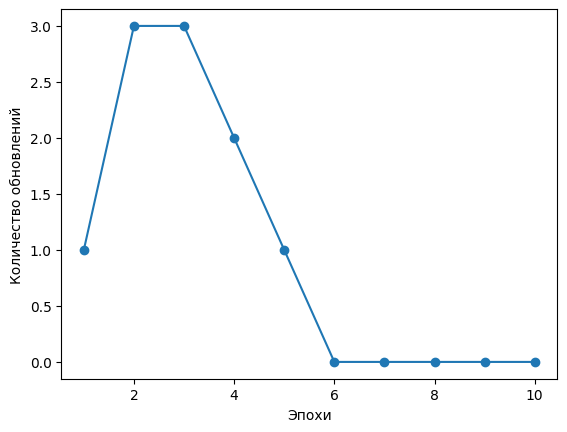

In [44]:
# обучим персептрон
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_,marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')
plt.show()

## Создание графика решения.

In [51]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers = ('s','x','o','4','.')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[ :, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black') 

C:\Users\Kozo\AppData\Local\Temp\ipykernel_18512\3118110826.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


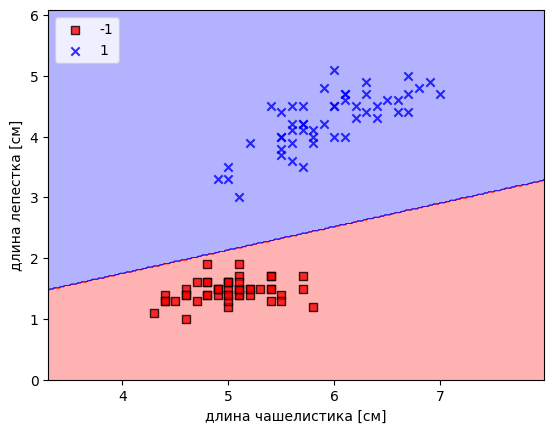

In [52]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show() 

# 2. Адаптивный линейный нейрон Adaline. 

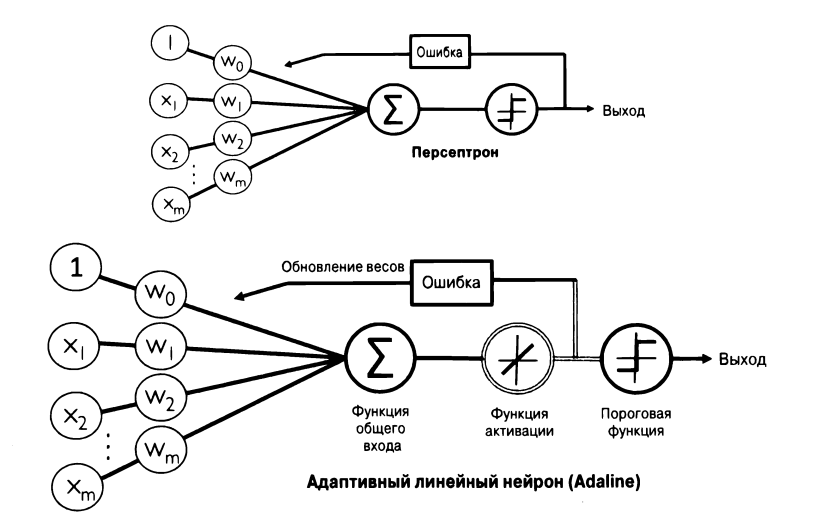

## Реализация

In [14]:
import numpy as np
class AdalineGD(object):
    """
    Параметры
    eta : float скорость обучения (от 0.0 до 1.0)
    n_inter : int количество эпох
    random_state : int начальное значение генератора случайных чисел для инициализации случайными весами
    Атрибуты
    w_ одмомерный массив весов
    errors_ список неправильных классификаций в каждой эпохе
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """
        Обучение персептрона.
        X: {массив обучающих векторов} форма = [n_examples, n_features] (кол-во образцов и кол-во признаков)
        y: {целевые значения} форма = [n_examples] (кол-во значений)
        return: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+ X.shape[1])
        self.cost_ = []
        for i in range (self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Линейная активация"""
        return X
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X)>=0.0, 1, -1) # если больше 0 - то 1. если меньше нуля -1

## Обучение нейрона за счет градиентного спуска. J - функция издержек, которая представляет собой сумму квадратов ошибок (SSE).

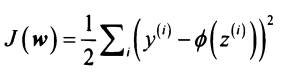
* Ф - сумма произведения матрицы столбца весов на матрицу столбец значений. $w^{T}x$
* 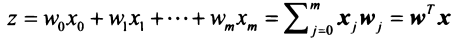

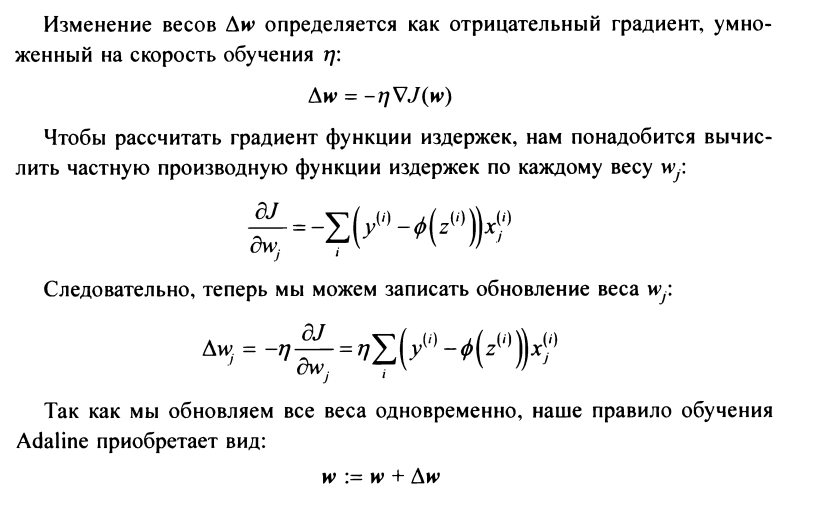

## Док-во теоремы

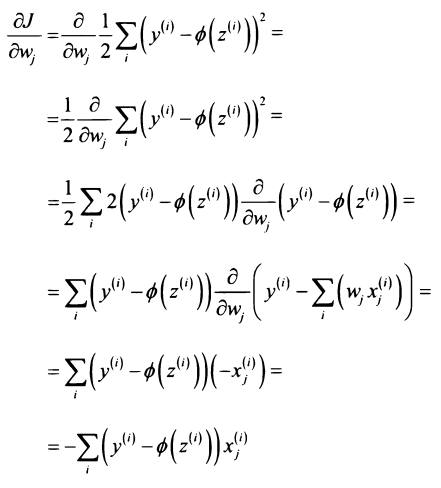

## Решение задачи классификации цветка ириса при разной скорости обучения. 0.01 и 0.00001

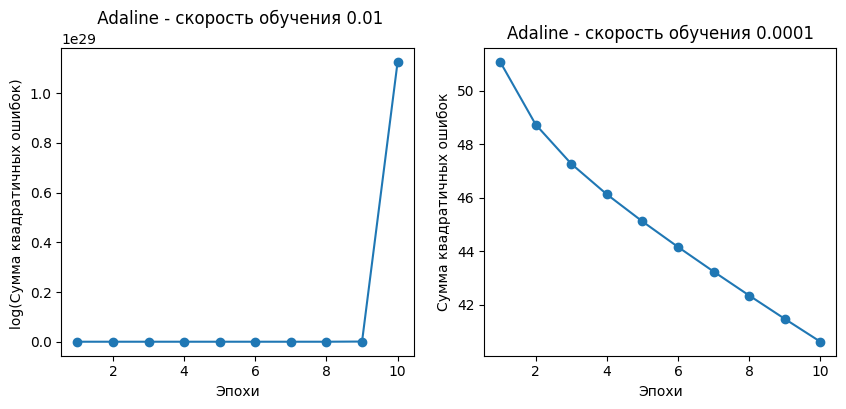

In [15]:
import matplotlib.pyplot as plt
fig , ax= plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range (1 , len(ada1.cost_) + 1),ada1.cost_, marker='o')
ax[0] .set_xlabel ('Эпохи')
ax[0].set_ylabel('log(Cyммa квадратичных ошибок) ')
ax[0].set_title(' Adaline - скорость обучения 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001) . fit(X, y)
ax[1] .plot(range (1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1] .set_xlabel('Эпохи')
ax[1] .set_ylabel('Cyммa квадратичных ошибок')
ax[1] .set_title('Adaline - скорость обучения 0.0001')
plt.show () 

C:\Users\Kozo\AppData\Local\Temp\ipykernel_18512\3118110826.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


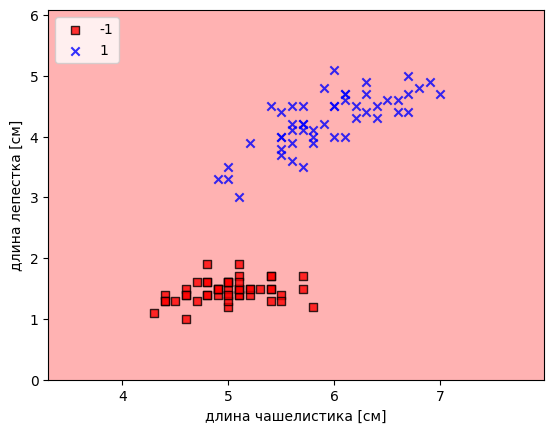

In [16]:
plot_decision_regions(X,y,classifier=ada1)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show() 

C:\Users\Kozo\AppData\Local\Temp\ipykernel_18512\3118110826.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


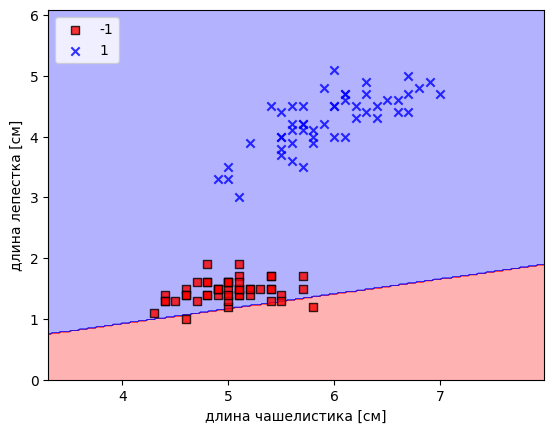

In [17]:
plot_decision_regions(X,y,classifier=ada2)
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show() 

### Видно, что при скорости обучения 0.01 персептрон не сходится. Квадратичная ошибка увеличивается. Градиент проскочил глобальный минимум. Наглядная демонстрация ниже. 

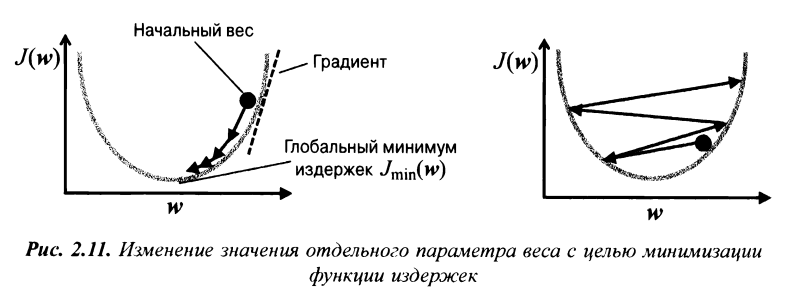

# 3. Улучшение rрадиентноrо спуска посредством масштабирования признаков. Стандартизация. 

### Процедура нормализации содействует более быстрому схождению обучения с градиентным спуском; однако, она не делает исходный набор данных нормально распределенным. Стандартизация так смещает среднее каждого признака, что оноцентрируется возле нуля, и каждый признак имеет стандартное отклонение 1 (единичную дисперсию). 

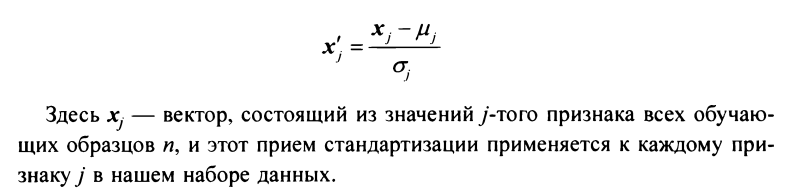

### Одна из причин, по которым стандартизация содействует обучению с градиентным спуском, заключается в том, что оптимизатору приходится проходить через меньшее число шагов в поиске хорошего или оптимального решения (глобального минимума издержек). 

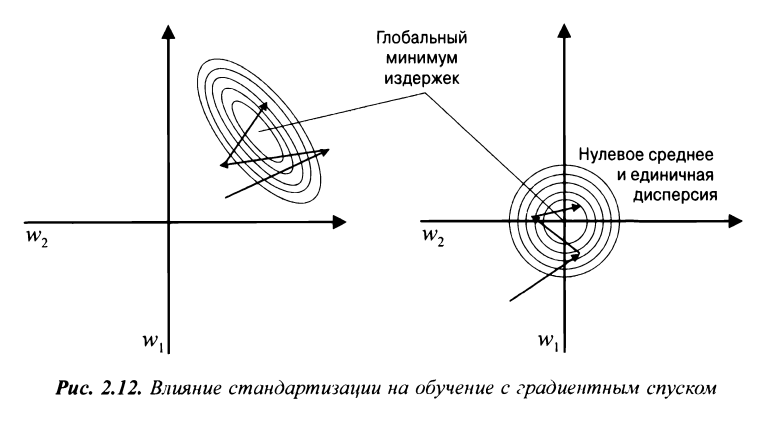

In [18]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean()) / X[:,1].std()


C:\Users\Kozo\AppData\Local\Temp\ipykernel_18512\3118110826.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


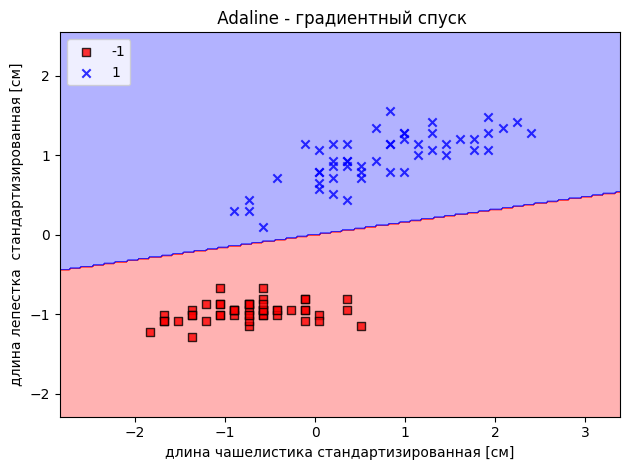

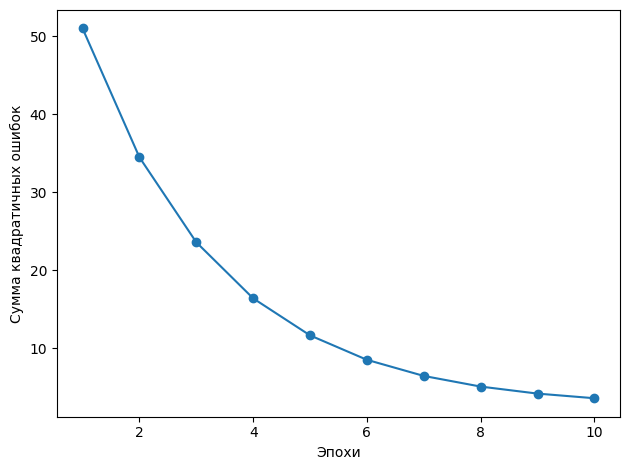

In [19]:
import matplotlib.pyplot as plt

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X_std, y)

plot_decision_regions(X_std,y,classifier=ada1)
plt.title(' Adaline - градиентный спуск')
plt.xlabel('длина чашелистика стандартизированная [см]')
plt.ylabel('длина лепестка  стандартизированная [см]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show() 

plt.plot(range (1 , len(ada1.cost_) + 1),ada1.cost_, marker='o')
plt.xlabel ('Эпохи')
plt.ylabel('Cyммa квадратичных ошибок')
plt.tight_layout()
plt.show() 


# 4. Стохастический градиентный спуск. 

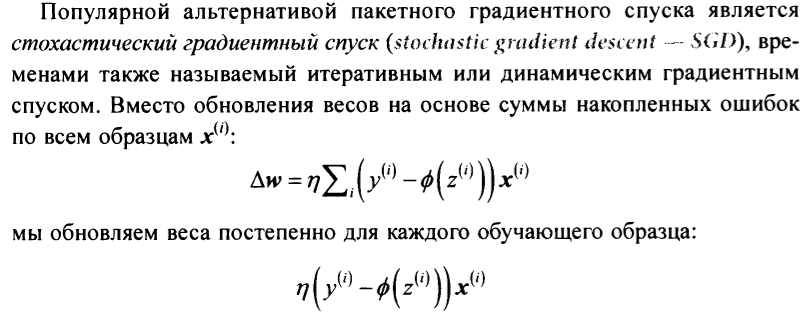

In [20]:
import numpy as np
class AdalineSGD(object):
    """
    Параметры
    eta : float скорость обучения (от 0.0 до 1.0)
    n_inter : int количество эпох
    random_state : int начальное значение генератора случайных чисел для инициализации случайными весами
    shuffle: если True, то тогда переходим к функции тасования данных во избежание цикла. 
    Атрибуты
    w_ одмомерный массив весов
    errors_ список неправильных классификаций в каждой эпохе
    """
    def __init__(self, eta = 0.01, n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Обучение персептрона.
        X: {массив обучающих векторов} форма = [n_examples, n_features] (кол-во образцов и кол-во признаков)
        y: {целевые значения} форма = [n_examples] (кол-во значений)
        return: object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range (self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost) / len(y) 
            self.cost_.append(avg_cost)
        return self
    def partial_fit(self, X, y):
        """Пакетное дообучение без инициализации старых данных"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1: # если пакет из более чем 1 значения - перебираем и обновляем веса
            for xi, target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y) # иначе обновляе только одну запись-пакет
        return self
    
    def _shuffle(self, X, y):
        """Тасует данные"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Инициализирует веса небольшими случайными числами"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Обновляет веса по правилу Adaline"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        """Линейная активация"""
        return X
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.activation(self.net_input(X))>=0.0, 1, -1) # если больше 0 - то 1. если меньше нуля -1

## Применение

C:\Users\Kozo\AppData\Local\Temp\ipykernel_18512\3118110826.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


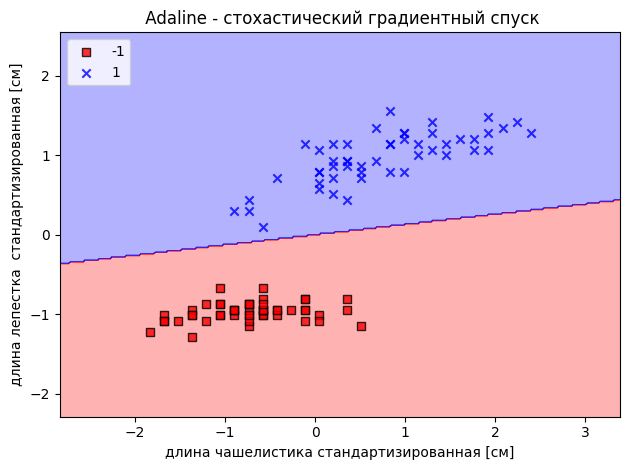

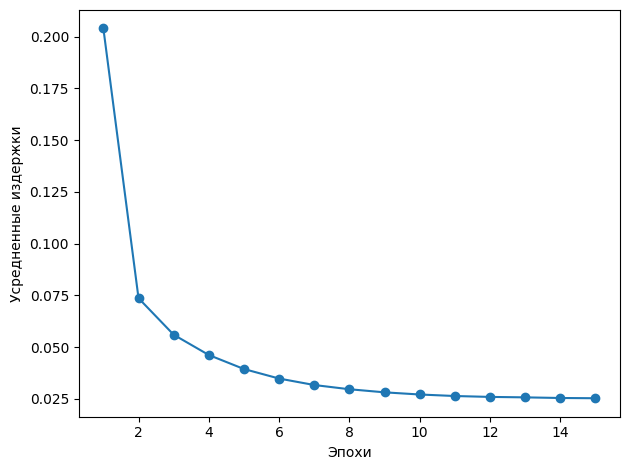

In [21]:
import matplotlib.pyplot as plt

ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1).fit(X_std, y)

plot_decision_regions(X_std,y,classifier=ada_sgd)
plt.title(' Adaline - стохастический градиентный спуск')
plt.xlabel('длина чашелистика стандартизированная [см]')
plt.ylabel('длина лепестка  стандартизированная [см]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show() 

plt.plot(range (1 , len(ada_sgd.cost_) + 1),ada_sgd.cost_, marker='o')
plt.xlabel ('Эпохи')
plt.ylabel('Усредненные издержки')
plt.tight_layout()
plt.show() 

# 5. Применение sklearn

## Загрузим базу цветков ириса

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('Метки классов:', np.unique(y) )

Метки классов: [0 1 2]


## Создадим обучающую и тестовую выборки

In [4]:
from  sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
print('Количество меток в Y_test', np.bincount(Y_test))

Количество меток в Y_test [15 15 15]


## Стандартизируем данные

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Создание персептрона

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.01, random_state = 1)
ppn.fit(X_train_std, Y_train)

Perceptron(eta0=0.01, random_state=1)

In [7]:
from sklearn.metrics import accuracy_score
Y_pred = ppn.predict(X_test_std)
print('Неправильно определено: %d' % (Y_test != Y_pred).sum() )
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))

Неправильно определено: 2
Accuracy: 0.956


## Графики

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, test_idx = None, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[ :, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black') 
    if test_idx:
        X_test,  y_test  =  X[test_idx,  :],  y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1], alpha=1, marker='o', linewidths=1, edgecolor='black', label='испытательный набор') 

C:\Users\Kozo\AppData\Local\Temp\ipykernel_17948\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


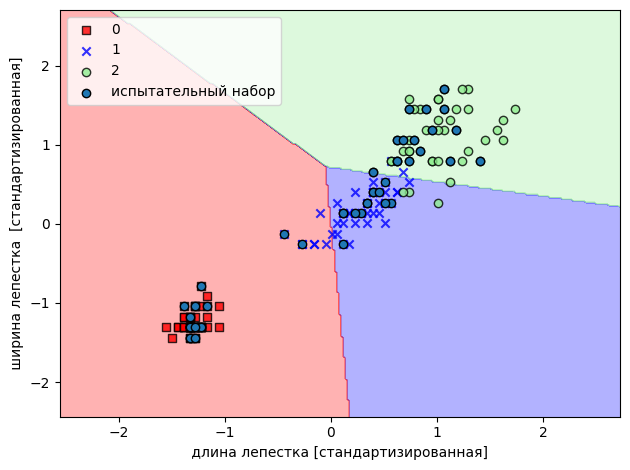

In [9]:
import matplotlib.pyplot as plt
X_combined_std =  np.vstack( (X_train_std,  X_test_std)) 
y_combined =  np.hstack( (Y_train,  Y_test)) 
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150) ) 
plt.xlabel(' длина лепестка [стандартизированная] ' ) 
plt.ylabel(' ширина лепестка  [стандартизированная] ' ) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

# 6. Логистическая регрессия. Сигмоидальная функция активации.

### Логит-функция перевеса

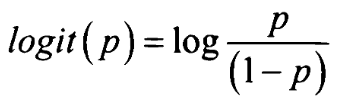
<br>
p - вероятность положительного события

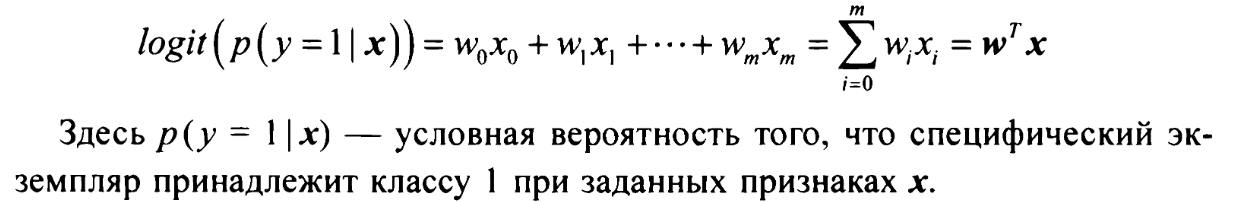

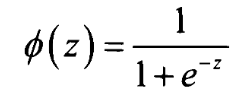
<br>
Логистическая сигмоидальная функция. Если значение выше определенного порога, то экземпляр принадлежит классу.

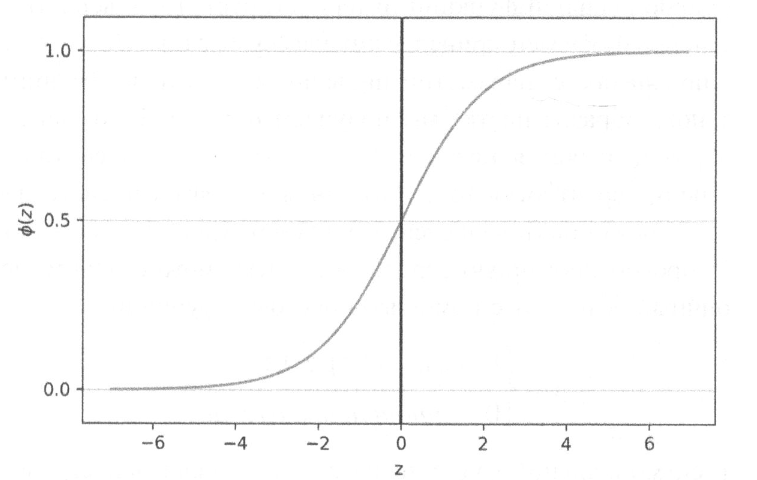

In [107]:
import numpy as np
class LogisticRegressionGD(object):
    """
    Параметры
    eta : float скорость обучения (от 0.0 до 1.0)
    n_inter : int количество эпох
    random_state : int начальное значение генератора случайных чисел для инициализации случайными весами
    Атрибуты
    w_ одмомерный массив весов
    errors_ список неправильных классификаций в каждой эпохе
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        """
        Обучение персептрона.
        X: {массив обучающих векторов} форма = [n_examples, n_features] (кол-во образцов и кол-во признаков)
        y: {целевые значения} форма = [n_examples] (кол-во значений)
        return: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+ X.shape[1])
        self.cost_ = []
        for i in range (self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ( (1 - y).dot(np.log(1  - output))))
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, z):
        """Вычисляет логистическую сигмоидальную активацию"""
        return 1./(1.+np.exp(-np.clip(z,-250,250)))
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X)>=0.0, 1, 0) # если больше 0 - то 1. если меньше нуля 0

C:\Users\Kozo\AppData\Local\Temp\ipykernel_17472\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


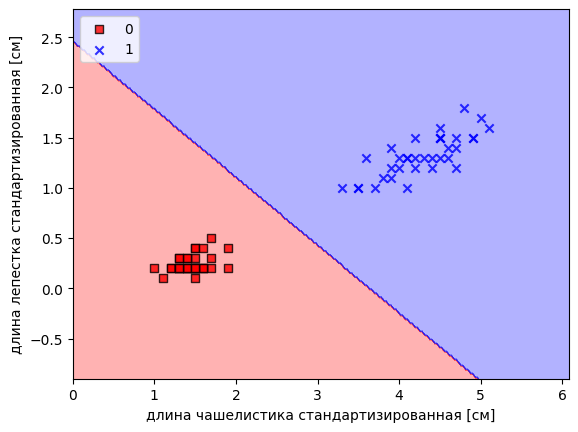

In [108]:

X_train_01_subset  =  X_train[ (Y_train == 0) | (Y_train == 1)]
y_train_01_subset  =  Y_train[ (Y_train == 0) | (Y_train == 1)]
reg = LogisticRegressionGD(eta=0.05,n_iter=1000,random_state=1)
reg.fit(X_train_01_subset,y_train_01_subset)
plot_decision_regions(X_train_01_subset,y_train_01_subset,classifier=reg)
plt.xlabel('длина чашелистика стандартизированная [см]')
plt.ylabel('длина лепестка стандартизированная [см]')
plt.legend(loc='upper left')
plt.show() 

### Что именно мы сделали выше. В качестве функции активации мы взяли сигмоидальную функцию, а не линейную, как в AdaLine

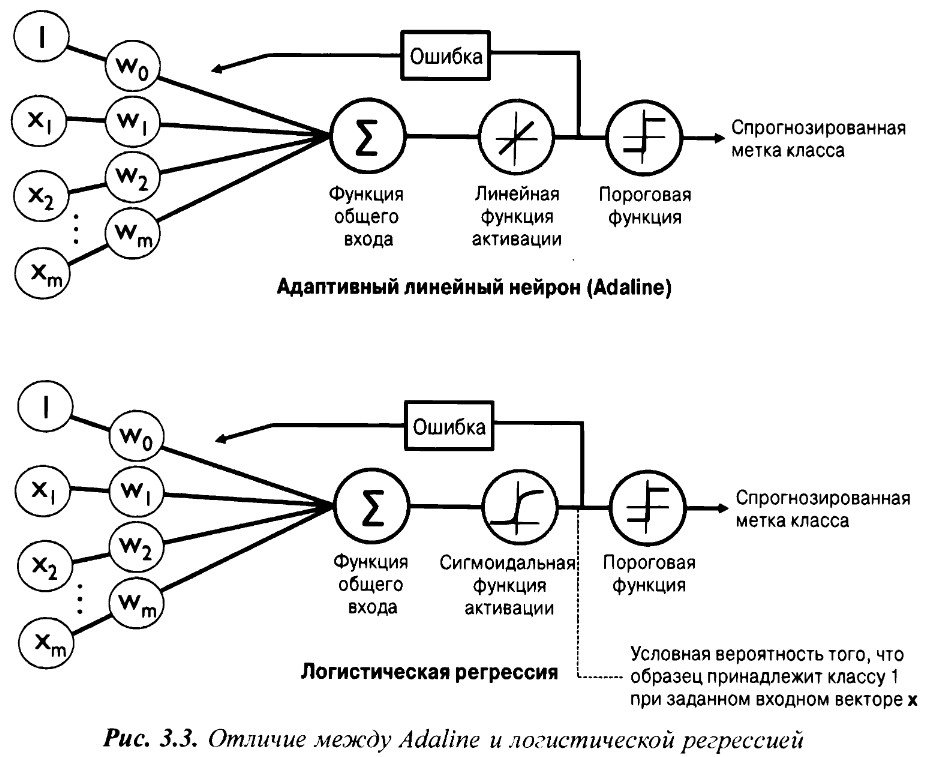

# 7. Логистическая регрессия в Sklearn

In [134]:
from sklearn.linear_model import LogisticRegression
lr_ovr = LogisticRegression(C=100.0, random_state = 1, solver = 'lbfgs', multi_class = 'ovr')
lr_ovr.fit(X_train_std, Y_train)
lr_multi = LogisticRegression(C=100.0, random_state = 1, solver = 'lbfgs', multi_class = 'multinomial')
lr_multi.fit(X_train_std, Y_train)

LogisticRegression(C=100.0, multi_class='multinomial', random_state=1)

In [136]:
from sklearn.metrics import accuracy_score
Y_pred = lr_ovr.predict(X_test_std)
print('OVR:')
print('Неправильно определено: %d' % (Y_test != Y_pred).sum() )
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))
Y_pred = lr_multi.predict(X_test_std)
print("Multinomial:")
print('Неправильно определено: %d' % (Y_test != Y_pred).sum() )
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))

OVR:
Неправильно определено: 1
Accuracy: 0.978
Multinomial:
Неправильно определено: 1
Accuracy: 0.978


C:\Users\Kozo\AppData\Local\Temp\ipykernel_17472\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


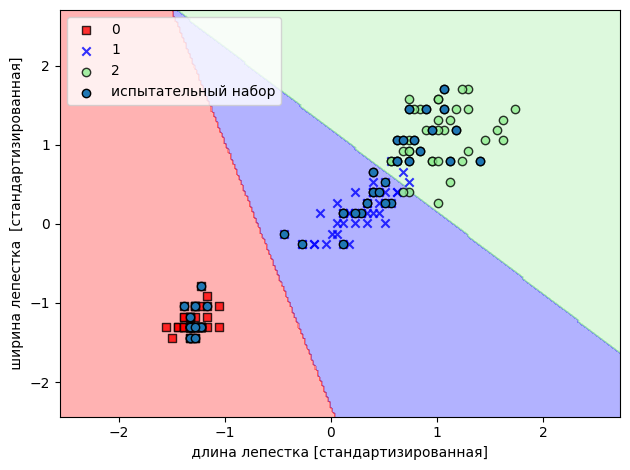

In [137]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr_ovr, test_idx=range(105, 150) ) 
plt.xlabel(' длина лепестка [стандартизированная] ' ) 
plt.ylabel(' ширина лепестка  [стандартизированная] ' ) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

C:\Users\Kozo\AppData\Local\Temp\ipykernel_17472\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


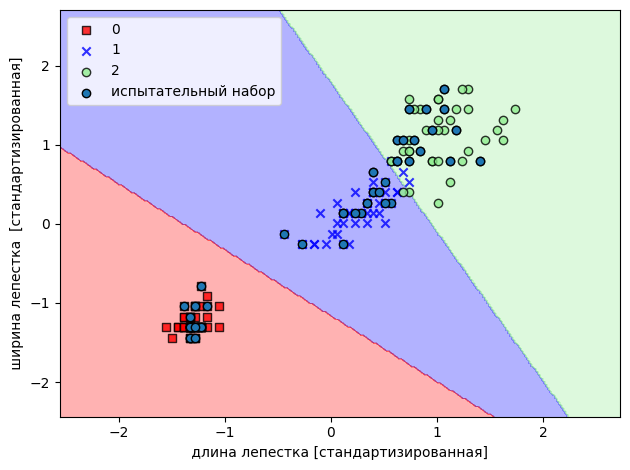

In [138]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr_multi, test_idx=range(105, 150) ) 
plt.xlabel(' длина лепестка [стандартизированная] ' ) 
plt.ylabel(' ширина лепестка  [стандартизированная] ' ) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

# 8. Метод опорных векторов SVM

## Теория

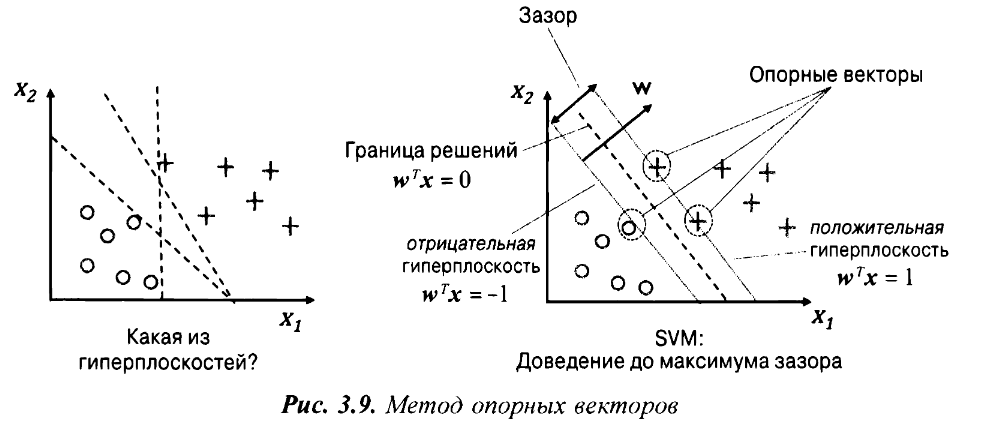

Если целью логистической регрессии было уменьшение ошибки неправильной классификации, то целью SVM является максимизация зазора. Данный зазор должен быть компромисом между смещением (недообучением) и дисперсией (переобучением)

$w_{0}+w^{T}x_{пол.}=1$ - положительная гиперплоскость
<br>
$w_{0}+w^{T}x_{отр.}=-1$ - отрицательная гиперплоскость
<br>
Если вычтем, получим уравнение: 
$$w^{T}(x_{пол.}-x_{отр.})=2$$ 
(с учетом, что x - векторы. См. пункт 1.)
<br>
Нормализуем по длинне вектора:
$$\frac{w^{T}(x_{пол.}-x_{отр.})}{||w||}=\frac{2}{||w||}$$
$$||w||=\sqrt{\sum_{j=1}^{m}w_{j}^{2}}$$
Теперь целевой функцией SVM является доведение до максимума зазора путем максимизации $\frac{2}{||w||}$ или же минимизации $\frac{1}{2}||w||^{2}$

Владимир Вапник (1995) ввел определение классификации с мягким зазором, используя фиктивную переменную $\xi$:
$$\frac{1}{2}||w||^{2} + C\sum_{i}{\xi^{(i)}}$$
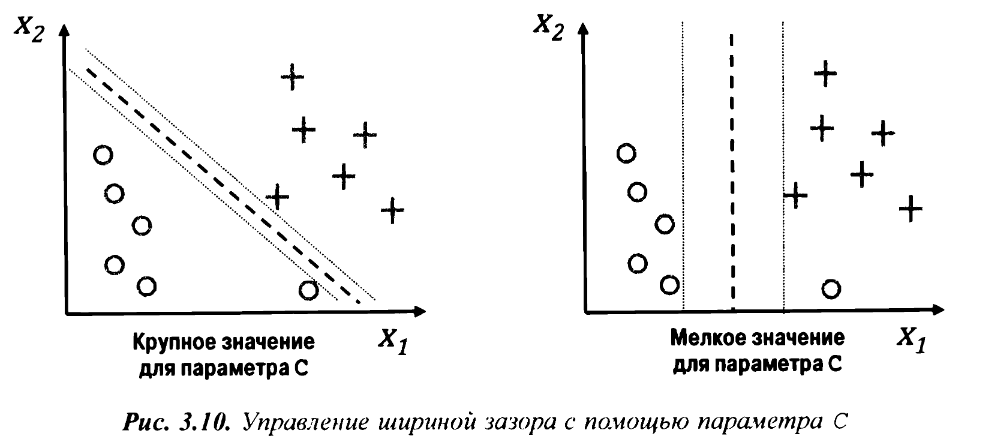

## Реализация в sklearn

C:\Users\Kozo\AppData\Local\Temp\ipykernel_17472\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


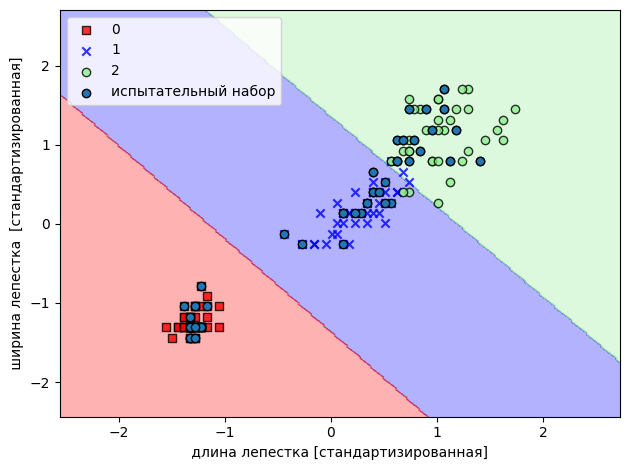

In [139]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear", C=1.0, random_state = 1)
svm.fit(X_train_std, Y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150) ) 
plt.xlabel(' длина лепестка [стандартизированная] ' ) 
plt.ylabel(' ширина лепестка  [стандартизированная] ' ) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

In [140]:
Y_pred = svm.predict(X_test_std)
print("SVM:")
print('Неправильно определено: %d' % (Y_test != Y_pred).sum() )
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))

SVM:
Неправильно определено: 1
Accuracy: 0.978


## Пакетное обучение vs обучение по частям

В Sklean SVC и LogisticRegression используют библиотеки LIBSVM и LIBLINEAR, соответственно, которые написаны на C++. Но, главный недостаток - пакетное обучение. Чтобы обучать динамически, нам потребуется SGDClassifier.

In [ ]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

# 9. Решение нелинейных задач с применением ядерного метода опорных векторов

## Создадим набор данных XOR, когда у 100 обьектов класс 1 и у других 100 класс -1.

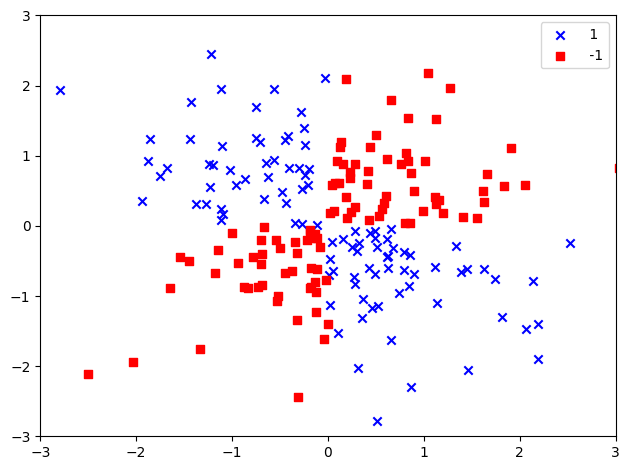

In [143]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_Xor = np.random.randn(200,2)
y_Xor = np.logical_xor(X_Xor[:,0]>0, X_Xor[:,1]>0)
y_Xor = np.where(y_Xor,1,-1)
plt.scatter(X_Xor[y_Xor ==  1,  0], X_Xor[y_Xor  ==  1,  1], c='b' ,  marker='x', label=' 1') 
plt.scatter(X_Xor[y_Xor ==  -1,  0], X_Xor [y_Xor  ==  -1,  1], c='r', marker='s', label=' -1') 
plt.xlim( [-3,  3]) 
plt.ylim( [-3,  3]) 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

Видно, что в данном случае невозможно решить задачу простым линейным классификатором. Применять SVM и регрессию бесполезно. Для этого нам и подойдет ядерный метод SVM.

## Принцип работы ядерного SVM.

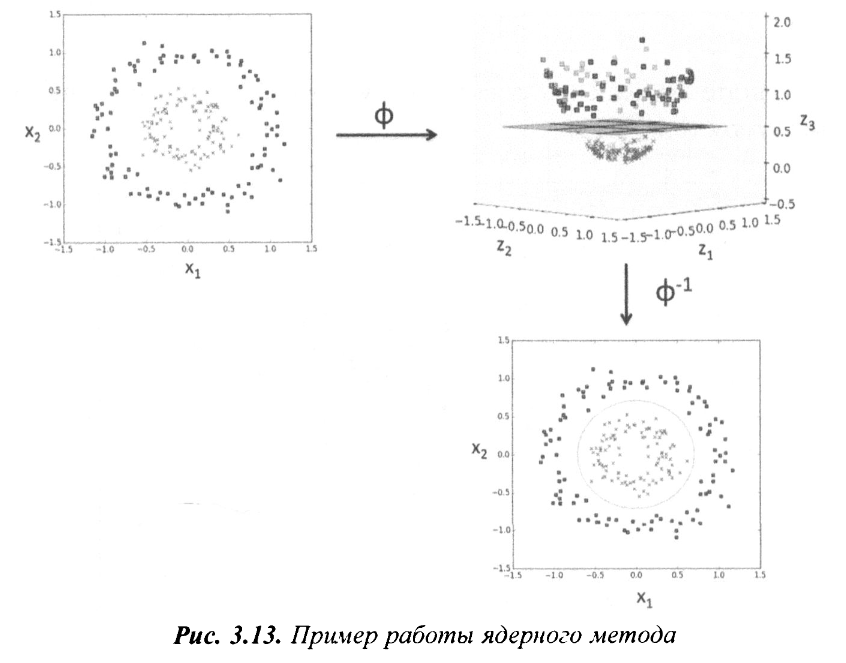

## Объяснение

Базовая идея ядерных методов, предназначенных для работы с такими линейно несепарабельными данными, заключается в создании нелинейных комбинаций исходных признаков с  целью их проецирования на простран­ство более высокой размерности через отображающую функцию ф,  где они становятся линейно сепарабельными. Посредством следующей проекции мы можем трансформировать двумерный набор данных в новое трехмерное про­странство признаков, внутри которого классы становятся сепарабельными:
$$\phi(x_{1},x_{2})=(z_{1},z_{2},z_{3})=(x_{1},x_{2},x_{1}^{2}+x_{2}^{2})$$

В результате, мы получаем возможность разделения двух классов через линейную гиперплоскость, которая превращается в нелинейную при уменьшении размерности обратно в исходную.

## Использование ядерноrо трюка для нахождения разделяющих гиперплоскостей в пространстве высокой размерности 

Мы могли бы использовать ядерный SVM сразу, добавляя новые признаки к объектам, но их вычисление связано с очень высокими вычислительными затратами, особенно если имеем дело с высокой размерностью. Чтобы избежать этого, мы можем выполнить один трюк (kernel trick).

Скалярное произведение $x^{(i)^{T}}x^{(j)}$ заменяется на $\phi(x^{(i)})^{T}\phi(x^{(j)}) $

Чтобы сэкономить на затратном шаге явного вычисления скалярного произведения двух точек, определим ядерную функцию:
$$K(x^{(i)}x^{(j)}) = \phi(x^{(i)})^{T} \phi(x^{(j)}) $$

Чаще всего используют радиально базисную функцию (гаусово ядро):
$$K(x^{(i)}x^{(j)}) = exp(-\frac{||x^{(i)}-x^{(j)}||^{2}}{2\sigma^{2}}) = exp(-\gamma||x^{(i)}-x^{(j)}||^{2}) $$

$\gamma=\frac{1}{2}\sigma^{2}$ - свободный параметр подлежащий оптимизации и им можно регулировать сдвиг/дисперсию

## Применение 

### Набор данных XOR

C:\Users\Kozo\AppData\Local\Temp\ipykernel_17472\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


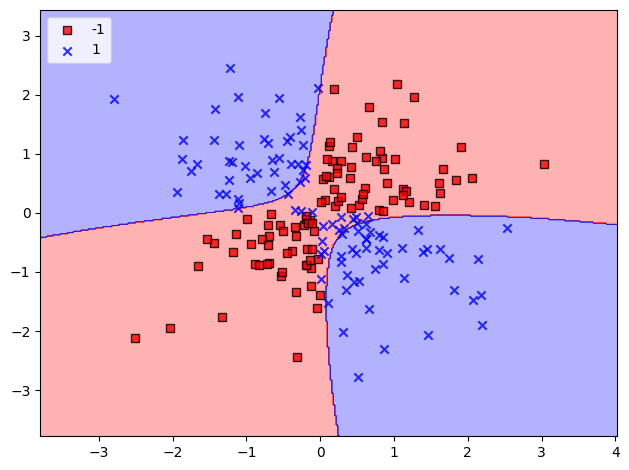

In [145]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", C=10.0, random_state = 1, gamma=0.10)
svm.fit(X_Xor, y_Xor)
plot_decision_regions(X_Xor, y_Xor, classifier=svm) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

### Набор данных IRIS

C:\Users\Kozo\AppData\Local\Temp\ipykernel_17472\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


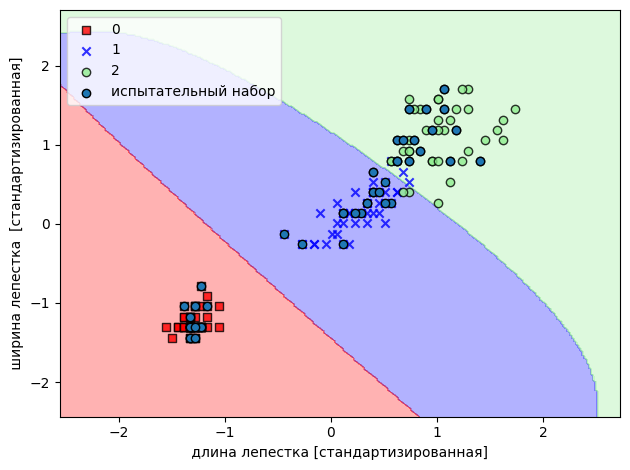

In [146]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", C=1.0, random_state = 1, gamma=0.20)
svm.fit(X_train_std, Y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150) ) 
plt.xlabel(' длина лепестка [стандартизированная] ' ) 
plt.ylabel(' ширина лепестка  [стандартизированная] ' ) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

### Увеличим параметр $\gamma$

C:\Users\Kozo\AppData\Local\Temp\ipykernel_17472\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


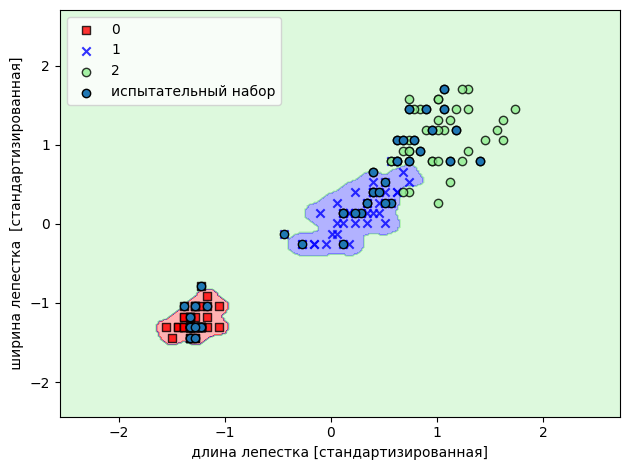

In [148]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf", C=1.0, random_state = 1, gamma=100)
svm.fit(X_train_std, Y_train)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150) ) 
plt.xlabel(' длина лепестка [стандартизированная] ' ) 
plt.ylabel(' ширина лепестка  [стандартизированная] ' ) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

# 10. Обучение моделей на основе деревьев принятия решений

Классификаторы на основе деревьев принятия решений являются хорошим решением, когда нас заботит интерпретируемость. Условно, такая модель разделяет данные на группы задавая ряд вопросов:

#### Схема

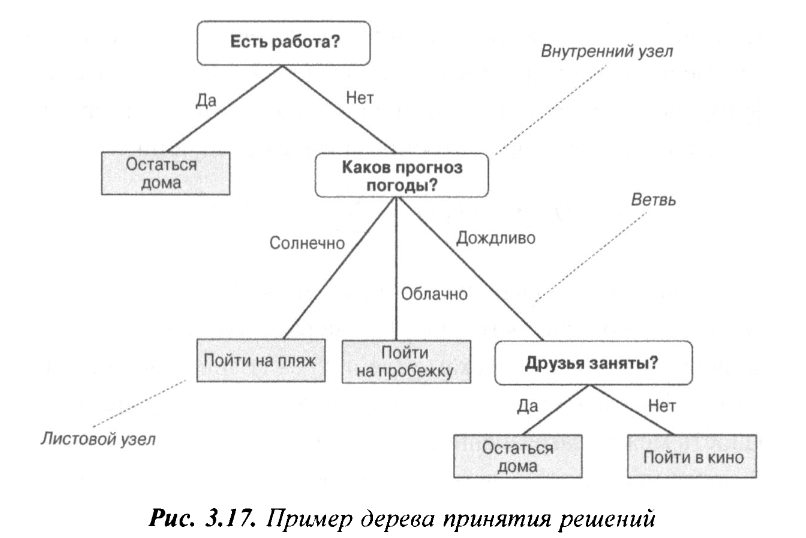

Хотя на рис. 3.17  иллюстрируется концепция дерева принятия решений, основанного на категориальных переменных, та же самая концепция применима и в случае, когда признаки представляют собой вещественные числа, как в наборе данных lris.  Например, мы могли бы просто определить отсекающее значение по оси признака "ширина ча­шелистика" и задать двоичный вопрос: ширина чашелистика больше 2.8  см?

## Прирост информации (Information gain)

Используя алгоритм принятия решения, мы начинаем с  корня дерева и разбиваем данные по признаку, который дает в результате наибольший прирост информации,как будет более подробно объясняться в следующем разделе. В рамках итерационного процесса мы повторяем описанную процедуру разбиения в каждом узле, пока листовые узлы не станут чистыми. Это означает, что все образцы в каждом узле при­надлежат тому же самому классу. На практике результатом может оказаться очень глубокое дерево с многочисленными узлами, что легко способно при­вести к переобучению. Таким образом, обычно мы подрезаем дерево, уста­навливая предел для его максимальной глубины.


## Целевая функция

Для того чтобы разделить узлы в самых информативных признаках, нам понадобится определить целевую функцию, которую необходимо оптими­зировать посредством алгоритма обучения дерева. В данном случае наша целевая функция заключается в доведении до максимума прироста инфор­мации при каждом разделении, что определяется следующим образом:
$$IG(D_{p},f)=I(D_{p})-\sum_{j=1}^{m}\frac{N_{j}}{N_{p}}I(D_{j})$$
$f$ - признак для выполнения разбиения <br>
$D_{p}$ - набор данных родительского узла <br>
$D_{j}$ - набор данных дочернего узла <br>
$N_{p}$ - кол-во образцов в родительском узле <br>
$N_{j}$ - кол-во образцов в дочернем узле <br>
$I$ - мера загрязненности <br>
Чем ниже загрязненность дочерних узлов тем выше прирост информации. 


В sklearn и других библиотеках, с целью сокращения пространства комбинаторного поиска, задействованы двоичные деревья принятия решений:
$$IG(D_{p},f)=I(D_{p})-\frac{N_{левый}}{N_{p}}I(D_{левый})-\frac{N_{правый}}{N_{p}}I(D_{правый})$$

## Три меры загрязненности. Джинни, энтропия и ошибка классификации ($I_{G}$,$I_{H}$,$I_{E}$)

### Энтропия

$$I_{H}=-\sum_{i=1}^{c}p(i|t)log_{2}p(i|t)$$
$p(i|t)$ - доля образцов, которые принадлежат классу i для индивидуального узла t. <br>

Примеры: <br>
Допустим, в узле 20 образцов. 
Все 20 принадлежат первому классу, тогда p(1|t) = 1, p(2|t)=0, $log_{2}(1)=0$ и энтропия равна нулю, так как в других классах нет образцов, а логарифм от 0 неопределен. <br>
Пусть $p(1|t)=p(2|t)=\frac{1}{2}$. Тогда $p(1|t)log_{2}(1/2)=p(2|t)log_{2}(1/2)=0.5$. <br>
Энтропия равна 1. <br>

Таким образом, мы можем говорить, что критерий энтропии стремится до­вести до максимума полное количество информации в дереве. 

### Загрязненность Джинни

Загрязненность Джинни можно понимать как критерий для минимизации вероятности неправильной классификации: 
$$I_{G}(t)=\sum_{i=1}^{c}p(i|t)(1-p(i|t))=1-\sum_{i=1}^{c}p(i|t)^{2}$$

Как и в энтропии, загрязненность Джинни максимальна, если классы в полной мере перемешаны:
$$p(1|t)=p(2|t)=\frac{1}{2}$$
$$I_{G}(t)=1-p(1|t)^{2}-p(2|t)^{2}=1-0.25-0.25=0.5$$

### Ошибка классификации

$$I_{E}=1-max(p(i|t))$$

Ошибка классификации - полезный критерий, но не рекомендуется для выращивания дерева принятия решений, т.к она менее чувствительна к изменениям в вероятностях классов узлов. 

#### Пример с графиком

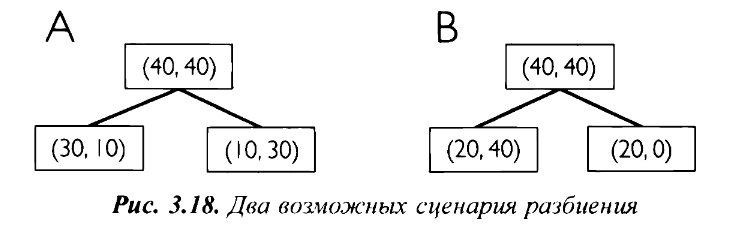

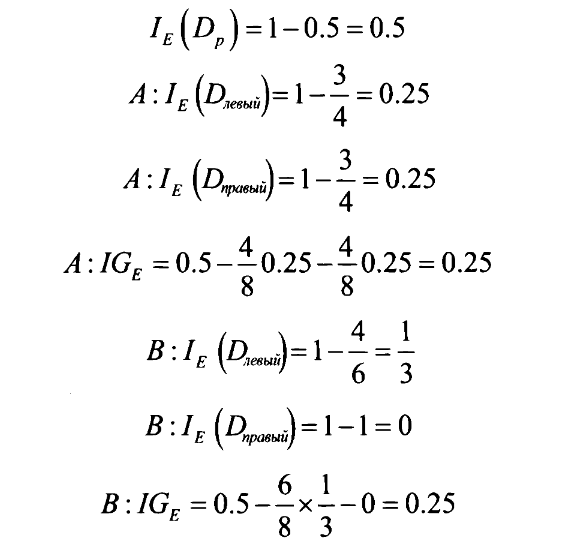

Прирост информации в случаях A и B при использовании ошибки классификации одинаковый. Но, если использовать критерий Джинни, то выбор падет на вариант B:

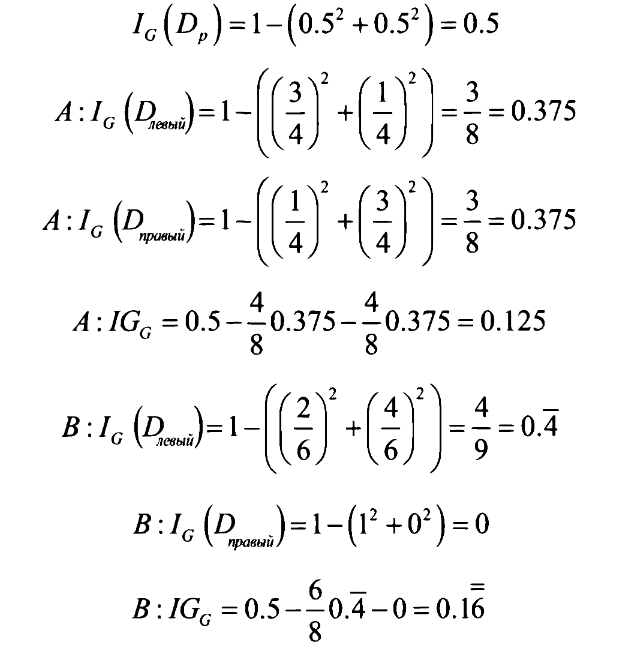

Тоже самое с энтропией:

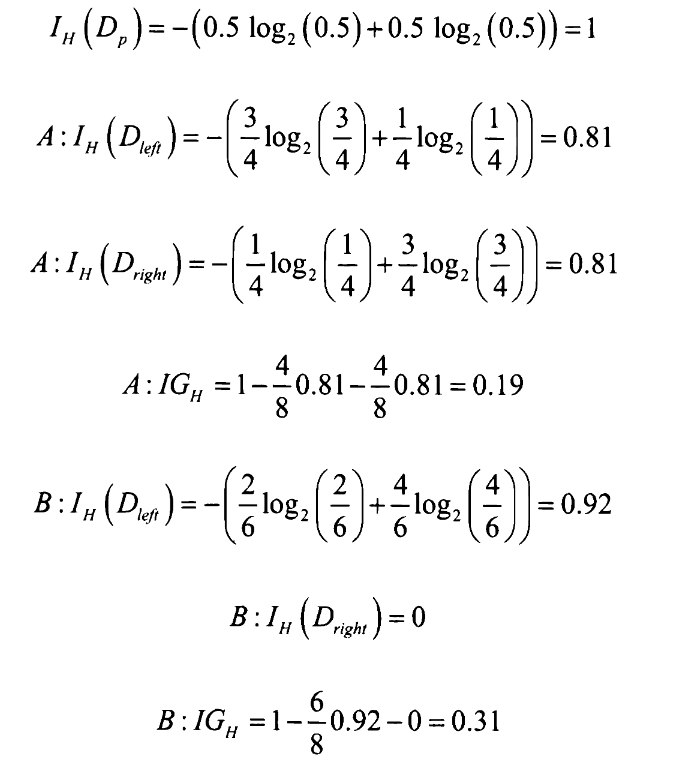

### График индексов загрязненности

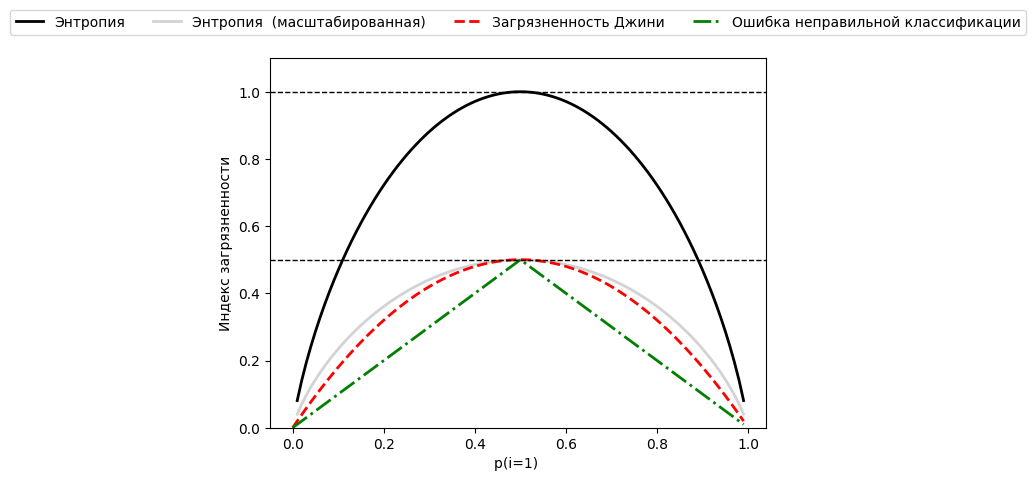

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p) * (1 - (p)) + (1 - p) * (1 - (1 - p))
def entropy(p):
    return  - p * np.log2(p) - (1 - p) * np.log2((1 - p))
def error(p):
    return  1 - np.max ( [p,  1 - p])

x =  np.arange(0.0,  1.0,  0.01)  
ent  = [entropy(p)  if p !=  0  else None  for  p in x] 
sc_ent  = [e*0.5 if e else None  for  e in ent] 
err =  [error(i)  for  i in x] 
fig  =  plt.figure() 
ax = plt.subplot (111) 
for  i,  lab,  ls,  c,  in zip ([ent,  sc_ent,  gini (x),  err], ['Энтропия',  'Энтропия  (масштабированная)', 'Загрязненность Джини', 
'Ошибка неправильной классификации'], [ '-',  '-' , '--' , '-.' ],  ['black',  'lightgray', 'red',  'green',  'cyan']): 
    line =  ax.plot(x,  i,  label=lab, linestyle=ls,  lw=2,  color=c) 
ax.legend(loc='upper center',  bbox_to_anchor=(0.5,  1.15), ncol=5, fancybox=True, shadow=False) 
ax.axhline(y=0.5,  linewidth=1,  color='k',  linestyle='--') 
ax.axhline(y=1.0,  linewidth=1,  color='k',  linestyle='--') 
plt.ylim( [0,  1.1]) 
plt.xlabel('p(i=1) ') 
plt. ylabel ('Индекс загрязненности') 
plt. show () 

## Построение дерева с помощью Sklearn

### Характеристики: макс. глубина = 4, используется критерий Джинни

C:\Users\Kozo\AppData\Local\Temp\ipykernel_17948\436412490.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


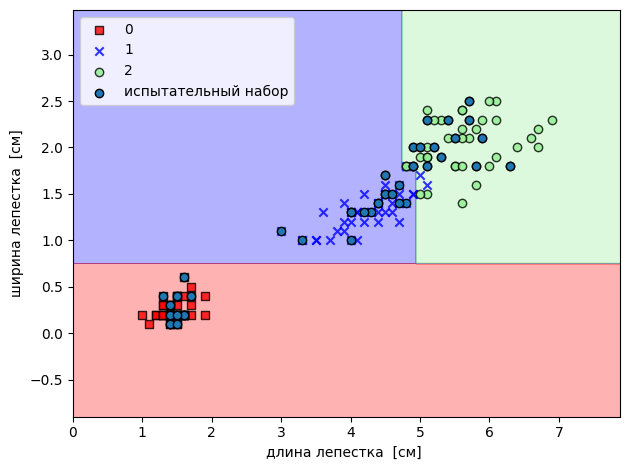

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(X_train, Y_train)
X_combined =  np. vstack ( (X_train,  X_test)) 
y_combined =  np.hstack ( (Y_train,  Y_test)) 
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105,  150)) 
plt.xlabel ( 'длина лепестка  [см] '  ) 
plt.ylabel ('ширина лепестка  [см]') 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
Y_pred = tree_model.predict(X_test)
print('Неправильно определено: %d' % (Y_test != Y_pred).sum() )
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))

Неправильно определено: 1
Accuracy: 0.978


### Создания графика дерева с помощью sklearn

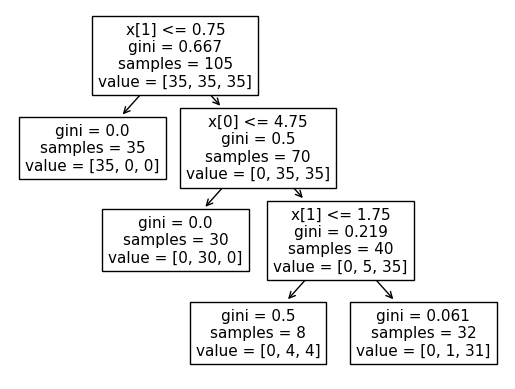

In [27]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

### Создание графика дерева с помощью pydotplus

In [19]:
from  pydotplus  import  graph_from_dot_data 
from  sklearn. tree import export_graphviz 
dot_data =  export_graphviz(tree_model, filled=True, rounded=True, 
                        class_names=['Setosa', 'Versicolor', 'Virginica'], 
                        feature_names=['petal length', 'petal width' ] , 
                        out_file=None) 
graph  =  graph_from_dot_data(dot_data) 
graph.write_png('tree.png')

True